# **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# **Load the Dataset**

In [2]:
# Define path for file with sonnets
SONNETS_FILE = '/content/Laurences_generated_poetry.txt'

# Read the data
with open('/content/Laurences_generated_poetry.txt') as f:
    data = f.read()

# **Tokenize the Text**

In [3]:
tokenizer = Tokenizer()

In [4]:
# Fit the text into list
tokenizer.fit_on_texts([data])

In [5]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'my': 7,
 'in': 8,
 'me': 9,
 'for': 10,
 'you': 11,
 'all': 12,
 'was': 13,
 'she': 14,
 'that': 15,
 'on': 16,
 'with': 17,
 'her': 18,
 'but': 19,
 'as': 20,
 'when': 21,
 'love': 22,
 'is': 23,
 'your': 24,
 'it': 25,
 'will': 26,
 'from': 27,
 'by': 28,
 'they': 29,
 'be': 30,
 'are': 31,
 'so': 32,
 'he': 33,
 'old': 34,
 'no': 35,
 'oh': 36,
 'ill': 37,
 'at': 38,
 'one': 39,
 'his': 40,
 'there': 41,
 'were': 42,
 'heart': 43,
 'down': 44,
 'now': 45,
 'we': 46,
 'where': 47,
 'young': 48,
 'never': 49,
 'go': 50,
 'come': 51,
 'then': 52,
 'did': 53,
 'not': 54,
 'said': 55,
 'away': 56,
 'their': 57,
 'sweet': 58,
 'them': 59,
 'green': 60,
 'if': 61,
 'take': 62,
 'our': 63,
 'like': 64,
 'night': 65,
 'day': 66,
 'o': 67,
 'out': 68,
 'fair': 69,
 'this': 70,
 'town': 71,
 'have': 72,
 'can': 73,
 'true': 74,
 'its': 75,
 'thou': 76,
 'see': 77,
 'dear': 78,
 'more': 79,
 'theres': 80,
 'or': 81,
 'had': 82,
 'wou

In [6]:
total_words = len(tokenizer.word_index) + 1
total_words

2690

In [7]:
for sentence in data.split('\n'):
  print(sentence)

Come all ye maidens young and fair
And you that are blooming in your prime
Always beware and keep your garden fair
Let no man steal away your thyme
For thyme it is a precious thing
And thyme brings all things to my mind
nlyme with all its flavours, along with all its joys
Thyme, brings all things to my mind
Once I and a bunch of thyme
i thought it never would decay
Then came a lusty sailor
Who chanced to pass my way
And stole my bunch of thyme away
The sailor gave to me a rose
A rose that never would decay
He gave it to me to keep me reminded
Of when he stole my thyme away
Sleep, my child, and peace attend thee
All through the night
Guardian angels God will send thee
Soft the drowsy hours are creeping
Hill and dale in slumber sleeping
I my loving vigil keeping
While the moon her watch is keeping
While the weary world is sleeping
Oer thy spirit gently stealing
Visions of delight revealing
Breathes a pure and holy feeling
Though I roam a minstrel lonely
My true harp shall praise sing onl

In [8]:
# Convert sentences into tokens and save into list
input_sequences = []
for sentence in data.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [9]:
input_sequences

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [10]:
# Check the max_len
max_len = max([len(x) for x in input_sequences])
max_len

16

# **Add padding to the sequences**

In [11]:
# Zero Padding
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

In [12]:
padded_input_sequences

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]], dtype=int32)

# **Split the Data**

In [13]:
X = padded_input_sequences[:,:-1]

In [14]:
y = padded_input_sequences[:,-1]

In [15]:
X.shape

(12038, 15)

In [16]:
y.shape

(12038,)

In [17]:
# One Hot Encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=2690)

In [18]:
y.shape

(12038, 2690)

# **Create the Model**

In [19]:
# Build the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_len-1))  # input_length=max_len-1 to match the input shape
model.add(Bidirectional(LSTM(150, return_sequences=True)))  # return_sequences=True to ensure the output is compatible with the next LSTM layer
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

In [20]:
# Compile the
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [21]:
# Check the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirection  (None, 15, 300)           301200    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 300)               541200    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2690)              809690    
                                                                 
Total params: 1921090 (7.33 MB)
Trainable params: 1921090 (7.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(X,y,epochs=100)

Epoch 1/100
377/377 [==============================] - 21s 34ms/step - loss: 6.7138 - accuracy: 0.0646
Epoch 2/100
377/377 [==============================] - 6s 15ms/step - loss: 6.2271 - accuracy: 0.0766
Epoch 3/100
377/377 [==============================] - 5s 14ms/step - loss: 6.0030 - accuracy: 0.0882
Epoch 4/100
377/377 [==============================] - 5s 13ms/step - loss: 5.7934 - accuracy: 0.1010
Epoch 5/100
377/377 [==============================] - 5s 13ms/step - loss: 5.6232 - accuracy: 0.1083
Epoch 6/100
377/377 [==============================] - 5s 12ms/step - loss: 5.4832 - accuracy: 0.1185
Epoch 7/100
377/377 [==============================] - 5s 13ms/step - loss: 5.3409 - accuracy: 0.1239
Epoch 8/100
377/377 [==============================] - 5s 13ms/step - loss: 5.1899 - accuracy: 0.1312
Epoch 9/100
377/377 [==============================] - 4s 11ms/step - loss: 5.0487 - accuracy: 0.1375
Epoch 10/100
377/377 [==============================] - 5s 14ms/step - loss: 4.91

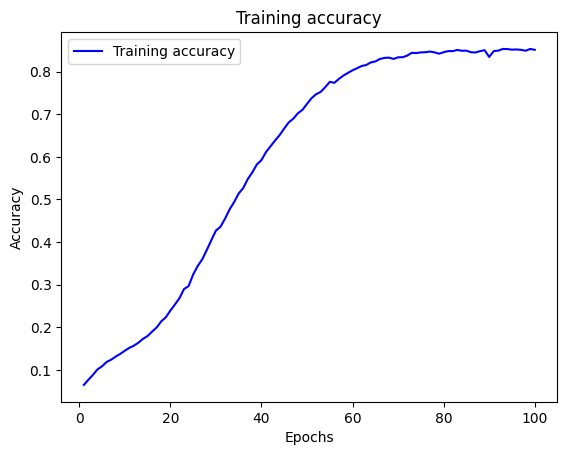

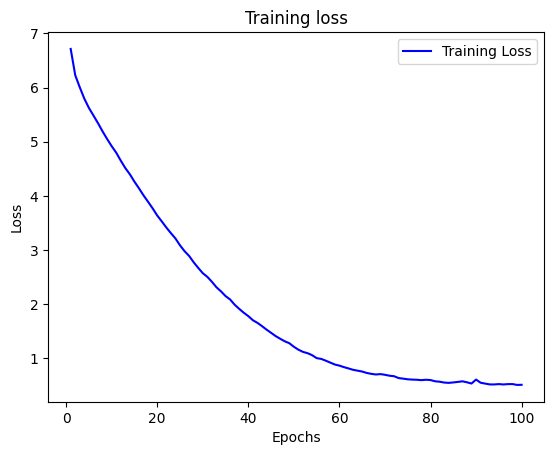

In [23]:
# Accessing training history
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

# Plotting training accuracy
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
def download_history():
  import pickle
  from google.colab import files

  with open('lstm_model.pkl', 'wb') as f:
    pickle.dump(model.history, f)

  files.download('lstm_model.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Check the Model Results**

In [25]:
# Check the model Prediction
import time

text = "And stole my"

for i in range(10):
    # Tokenize
    token_text = tokenizer.texts_to_sequences([text])[0]
    # Padding
    padded_token_text = pad_sequences([token_text], maxlen=max_len-1, padding='pre')  # Use max_len-1 for input length
    # Predict
    pos = np.argmax(model.predict(padded_token_text))

    # Retrieve word from index
    predicted_word = tokenizer.index_word[pos]
    text = text + " " + predicted_word
    print(text)
    time.sleep(2)


1/1 [==============================] - 1s 1s/step
And stole my bunch
1/1 [==============================] - 0s 20ms/step
And stole my bunch of
1/1 [==============================] - 0s 19ms/step
And stole my bunch of thyme
1/1 [==============================] - 0s 25ms/step
And stole my bunch of thyme away
1/1 [==============================] - 0s 19ms/step
And stole my bunch of thyme away from
1/1 [==============================] - 0s 21ms/step
And stole my bunch of thyme away from life
1/1 [==============================] - 0s 21ms/step
And stole my bunch of thyme away from life to
1/1 [==============================] - 0s 19ms/step
And stole my bunch of thyme away from life to a
1/1 [==============================] - 0s 20ms/step
And stole my bunch of thyme away from life to a jewel
1/1 [==============================] - 0s 20ms/step
And stole my bunch of thyme away from life to a jewel when


In [26]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'my': 7,
 'in': 8,
 'me': 9,
 'for': 10,
 'you': 11,
 'all': 12,
 'was': 13,
 'she': 14,
 'that': 15,
 'on': 16,
 'with': 17,
 'her': 18,
 'but': 19,
 'as': 20,
 'when': 21,
 'love': 22,
 'is': 23,
 'your': 24,
 'it': 25,
 'will': 26,
 'from': 27,
 'by': 28,
 'they': 29,
 'be': 30,
 'are': 31,
 'so': 32,
 'he': 33,
 'old': 34,
 'no': 35,
 'oh': 36,
 'ill': 37,
 'at': 38,
 'one': 39,
 'his': 40,
 'there': 41,
 'were': 42,
 'heart': 43,
 'down': 44,
 'now': 45,
 'we': 46,
 'where': 47,
 'young': 48,
 'never': 49,
 'go': 50,
 'come': 51,
 'then': 52,
 'did': 53,
 'not': 54,
 'said': 55,
 'away': 56,
 'their': 57,
 'sweet': 58,
 'them': 59,
 'green': 60,
 'if': 61,
 'take': 62,
 'our': 63,
 'like': 64,
 'night': 65,
 'day': 66,
 'o': 67,
 'out': 68,
 'fair': 69,
 'this': 70,
 'town': 71,
 'have': 72,
 'can': 73,
 'true': 74,
 'its': 75,
 'thou': 76,
 'see': 77,
 'dear': 78,
 'more': 79,
 'theres': 80,
 'or': 81,
 'had': 82,
 'wou